get data (로이터 dataset)

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 21s 10us/step


In [5]:
type(train_data)

numpy.ndarray

In [14]:
print(len(train_data), len(test_data))

8982 2246


In [16]:
print(train_data[0])
print(train_labels)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[ 3  4  3 ... 25  3 25]


In [19]:
print(max(train_labels))

45


In [24]:
print( max([len(el) for el in train_data]) )
print( min([len(el) for el in train_data]) )

2376
13


convert to text (word decoding)

In [27]:
word_index = reuters.get_word_index()
reverse_word_index = dict([ (value, key) for (key, value) in word_index.items() ])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]  ])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

reday for data

- we cant inject numeric list to NN. so need to change list to tensor.
- there are two ways to make change.
- first method is Embedding
- second method is One-hot encoding
- in this section, we will use One-hot encoding

In [28]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다        
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

conver label data using one-hot encoding

이미 keras에 one-hot 을 잘해주는놈이 있음...

In [90]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

make model

In [63]:
from keras import models
from keras import layers
from keras import activations

model = models.Sequential()
model.add(layer=layers.Dense(64, activation=activations.relu, input_shape=(10000, ) ))
model.add(layer=layers.Dense(64, activation=activations.relu))
model.add(layer=layers.Dense(46, activation=activations.softmax))

In [64]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimiz.ers.RMSprop(),
              loss = losses.categorical_crossentropy,
              metrics = [metrics.categorical_accuracy]
             )

In [65]:
history = model.fit(x_train,
                    one_hot_train_labels,
                    batch_size=512,
                    epochs=20,
                    validation_split=0.1
                   )

Train on 8083 samples, validate on 899 samples
Epoch 1/20
8083/8083 [==============================] - 2s 249us/step - loss: 2.5583 - categorical_accuracy: 0.5108 - val_loss: 1.7956 - val_categorical_accuracy: 0.6296
Epoch 2/20
8083/8083 [==============================] - 1s 169us/step - loss: 1.3830 - categorical_accuracy: 0.7028 - val_loss: 1.3712 - val_categorical_accuracy: 0.7063
Epoch 3/20
8083/8083 [==============================] - 1s 170us/step - loss: 1.0195 - categorical_accuracy: 0.7802 - val_loss: 1.1977 - val_categorical_accuracy: 0.7353
Epoch 4/20
8083/8083 [==============================] - 1s 167us/step - loss: 0.7986 - categorical_accuracy: 0.8277 - val_loss: 1.1112 - val_categorical_accuracy: 0.7675
Epoch 5/20
8083/8083 [==============================] - 1s 170us/step - loss: 0.6327 - categorical_accuracy: 0.8659 - val_loss: 1.0488 - val_categorical_accuracy: 0.7697
Epoch 6/20
8083/8083 [==============================] - 1s 168us/step - loss: 0.5067 - categorical_accu

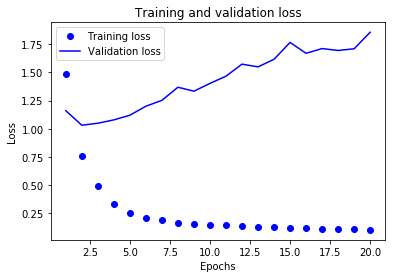

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

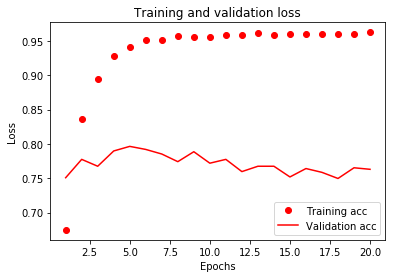

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

make new best model

In [67]:
from keras import *

model = models.Sequential()
model.add(layer=layers.Dense(64, activation=activations.relu, input_shape=(10000, ) ))
model.add(layer=layers.Dense(64, activation=activations.relu))
model.add(layer=layers.Dense(46, activation=activations.softmax))


model.compile(optimizer=optimizers.RMSprop(),
              loss = losses.categorical_crossentropy,
              metrics = [metrics.categorical_accuracy]
             )

history = model.fit(x_train,
                    one_hot_train_labels,
                    batch_size=512,
                    epochs=9,  # early stopping
                    validation_split=0.1
                   )

results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 8083 samples, validate on 899 samples
Epoch 1/9
8083/8083 [==============================] - 2s 249us/step - loss: 2.6217 - categorical_accuracy: 0.5019 - val_loss: 1.8223 - val_categorical_accuracy: 0.6652
Epoch 2/9
8083/8083 [==============================] - 1s 170us/step - loss: 1.3816 - categorical_accuracy: 0.7203 - val_loss: 1.3962 - val_categorical_accuracy: 0.7108
Epoch 3/9
8083/8083 [==============================] - 1s 170us/step - loss: 1.0109 - categorical_accuracy: 0.7915 - val_loss: 1.2217 - val_categorical_accuracy: 0.7453
Epoch 4/9
8083/8083 [==============================] - 1s 170us/step - loss: 0.7888 - categorical_accuracy: 0.8369 - val_loss: 1.1438 - val_categorical_accuracy: 0.7564
Epoch 5/9
8083/8083 [==============================] - 1s 170us/step - loss: 0.6244 - categorical_accuracy: 0.8731 - val_loss: 1.0751 - val_categorical_accuracy: 0.7753
Epoch 6/9
8083/8083 [==============================] - 1s 168us/step - loss: 0.5009 - categorical_accuracy: 

[0.9389311407467985, 0.790293855743544]

In [71]:
predictions = model.predict(x_test)
predictions[0].shape

(46,)

In [72]:
np.sum(predictions[0])

1.0

In [73]:
np.argmax(predictions[0])

3

In [86]:
[print( np.argmax(pred)) for pred in predictions.tolist()   ]

3
10
1
4
13
3
3
3
3
3
1
4
1
3
1
11
3
3
19
3
8
3
3
4
9
3
4
6
10
3
3
10
16
3
19
4
19
1
4
3
3
21
3
12
4
4
3
4
3
11
20
3
3
3
3
19
26
4
19
19
4
3
4
4
4
3
3
1
3
4
3
4
3
19
43
24
1
3
20
4
3
3
3
11
19
20
1
16
4
3
3
4
3
4
3
11
11
3
4
3
41
3
20
3
3
3
4
13
4
3
19
3
4
3
16
3
4
4
3
4
3
4
19
4
18
3
19
3
4
3
8
3
1
3
3
4
13
1
3
3
3
3
4
4
19
1
4
23
3
3
3
4
3
3
4
1
3
3
11
17
3
3
2
4
3
4
3
1
3
3
3
3
3
12
3
21
4
16
3
3
3
8
3
20
3
21
3
3
6
35
8
3
11
36
8
1
3
4
4
4
16
19
19
3
3
4
4
19
3
4
3
4
3
3
3
19
4
21
3
3
3
4
3
4
13
3
13
16
25
3
4
19
3
11
9
1
3
3
11
1
19
1
4
4
11
3
3
4
19
3
4
4
3
3
25
4
31
4
26
11
19
4
4
4
18
3
4
4
3
10
4
19
3
3
20
3
4
19
16
3
3
4
16
4
3
3
3
3
4
1
3
25
19
3
4
16
4
4
4
16
3
1
3
19
11
3
6
3
16
3
16
21
4
3
4
1
16
4
2
3
11
3
25
8
3
3
19
3
19
4
19
3
4
3
3
11
16
19
26
3
19
16
3
3
4
3
4
3
16
4
4
3
3
3
19
43
3
9
3
4
4
10
4
21
3
3
13
3
4
1
11
1
4
1
11
3
38
3
3
3
3
20
3
16
19
19
6
3
13
16
3
44
16
3
4
3
3
16
4
19
4
11
4
3
4
4
3
3
1
3
3
4
4
3
3
4
3
4
1
4
3
1
1
4
3
4
4
11
3
11
3
3
3
3
3
4
4
1
19
19

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

label 을 인코딩하는 또 다른 방법

In [92]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model.compile(optimizer=optimizers.RMSprop(),
              loss = losses.sparse_categorical_crossentropy,  # 이 부분만 변경하면 됨.
              metrics = [metrics.categorical_accuracy]
             )